# 피싱 웹 사이트 분석

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('phishing_Data.csv') #데이터 불러오기

In [4]:
display(df.head())

,-1,1,1.1,1.2,-1.1,-1.2,-1.3,-1.4,-1.5,1.3,...,1.9,1.10,-1.11,-1.12,-1.13,-1.14,1.11,1.12,-1.15,-1.16
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


In [5]:
df.columns=['IP_Address','URL_Length','Shortining_Service','Have_Symbol','slash_redirect','Prefix_Suffix','Sub_Domain','SSL_state','Https','Domain_regist','Favicon','standard_port','HTTPS_token','Request_URL','Anchor','Links_tag','SFH','Submit_email','Abnormal_URL','website_Forwarding','Status_Bar','RightClick','popUpwindow','Iframe','age_Domain','DNSRecord','Web_traffic','page_rank','Google_index','LInks_point','Statistic_report']

In [6]:
df.head()

,IP_Address,URL_Length,Shortining_Service,Have_Symbol,slash_redirect,Prefix_Suffix,Sub_Domain,SSL_state,Https,Domain_regist,...,RightClick,popUpwindow,Iframe,age_Domain,DNSRecord,Web_traffic,page_rank,Google_index,LInks_point,Statistic_report
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


In [7]:
df.isnull().sum() #결측치 확인

IP_Address            0
URL_Length            0
Shortining_Service    0
Have_Symbol           0
slash_redirect        0
Prefix_Suffix         0
Sub_Domain            0
SSL_state             0
Https                 0
Domain_regist         0
Favicon               0
standard_port         0
HTTPS_token           0
Request_URL           0
Anchor                0
Links_tag             0
SFH                   0
Submit_email          0
Abnormal_URL          0
website_Forwarding    0
Status_Bar            0
RightClick            0
popUpwindow           0
Iframe                0
age_Domain            0
DNSRecord             0
Web_traffic           0
page_rank             0
Google_index          0
LInks_point           0
Statistic_report      0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
plt.style.use('seaborn') # seaborn 스타일로 변환 (기본은 못생겼어요..)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)


# 2) 피쳐 분석

2)URL_Length 

In [10]:
Url = df['URL_Length'].value_counts()
Url

-1    8960
 1    1959
 0     135
Name: URL_Length, dtype: int64

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/Users/hyemzzzy/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyemzzzy/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyemzzzy/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyemzzzy/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyemzzzy/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47480 missing from current font.
  font.

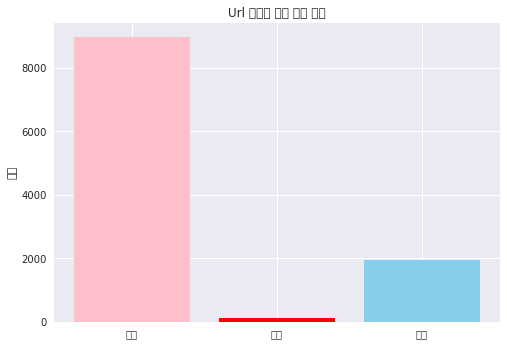

In [11]:
plt.bar(Url.index,Url, color =['pink','skyblue','red']) # x는 인덱스, y는 빈도수, color로 색 지정
plt.xticks(Url.index, ['피싱','정상','의심']) # x축을 여자,남자 범주로 변환
plt.title('Url 길이에 따른 피싱 판단')
plt.ylabel('빈도')
plt.show()

URL_Length가 54보다 작으면 1, 54와 75사이면 0, 75이상이면 -1로 분류

3) Shortining_Service

In [12]:
short_service = df['Shortining_Service'].value_counts()
short_service

 1    9610
-1    1444
Name: Shortining_Service, dtype: int64

/Users/hyemzzzy/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyemzzzy/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyemzzzy/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyemzzzy/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hyemzzzy/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hyemzzzy/opt/anaconda3/lib/python3.8/site-pac

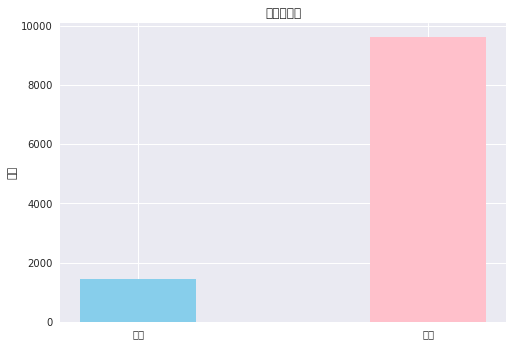

In [13]:
plt.bar(short_service.index, short_service, color =['pink','skyblue']) # x는 인덱스, y는 빈도수, color로 색 지정
plt.xticks(short_service.index, ['정상','피싱']) # x축을 여자,남자 범주로 변환
plt.title('호스트이름')
plt.ylabel('빈도')
plt.show()

호스트이름이 short_url과 같다면 -1로 피싱, 아니라면 1로 정상

3) Have Symbol

In [14]:
symbol = df['Have_Symbol'].value_counts()
symbol

 1    9399
-1    1655
Name: Have_Symbol, dtype: int64

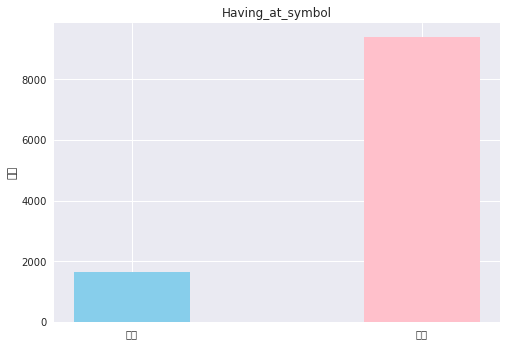

In [15]:
plt.bar(symbol.index, symbol, color =['pink','skyblue']) # x는 인덱스, y는 빈도수, color로 색 지정
plt.xticks(symbol.index, ['정상','피싱']) # x축을 여자,남자 범주로 변환
plt.title('Having_at_symbol')
plt.ylabel('빈도')
plt.show()

만약 url에서 @이 있다면 -1로 피싱, 아니라면 정상

# 3) 머신러닝 종류별로 돌려보기

In [16]:
inputs = df.iloc[:,:-1]
outputs = df.iloc[:, -1]

In [17]:
# 정상 및 피싱 사이트 2000개 훈련
training_inputs = inputs[:2000]
training_outputs = outputs[:2000]

testing_inputs = inputs[2000:]
testing_outputs = outputs[2000:] 

In [18]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(training_inputs, training_outputs)

predictions = classifier.predict(testing_inputs)

accuracy = 100.0* accuracy_score(testing_outputs, predictions)
print("Logistic regression accuracy =", str(accuracy))

Logistic regression accuracy = 84.54826595979678


In [19]:
#Decision regression
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
classifier.fit(training_inputs, training_outputs)

predictions = classifier.predict(testing_inputs)

accuracy = 100.0* accuracy_score(testing_outputs, predictions)
print("DecisionTree accuracy =", str(accuracy))

DecisionTree accuracy = 90.44621161917384


In [20]:
# RandomForest
from sklearn import ensemble

classifier = ensemble.RandomForestClassifier()
classifier.fit(training_inputs, training_outputs)

predictions = classifier.predict(testing_inputs)

accuracy = 100.0* accuracy_score(testing_outputs, predictions)
print("RandomForest accuracy =", str(accuracy))

RandomForest accuracy = 92.85398718798321
